# Morphology Module: Part 3 for CNS tutorial
----

*Load morphologies that were downloaded, analyze them, and compare species.*

For the first part of the tutorial, the user needs to create a *virtual lab* and save the URL of the lab. This will be used to authenticate the access of the user and allow access to the data. Once authentication is verified, the user will be able to access the data and search through it. We will select data by their species. We will download XXX mouse morphologies from temporal association cortex, and XXX human morpohlogies from temporal cortex. We saved these neurons locally in two different folders. We used the data for a statistical analysis of basic morphometrics. Now, the data will be used for the topological analysis between the two species. 

## 3.1 Use TMD to load morphologies

In [1]:
%matplotlib inline

import tmd
from tmd.view import view, plot
from matplotlib import pylab as plt
import numpy as np

In [2]:
Rat_morphologies = tmd.io.load_population('Rat/', use_morphio=True)

In [3]:
Mouse_morphologies = tmd.io.load_population('Mouse/', use_morphio=True)

## 3.2 Plot morphologies

In [4]:
rat_neuron = Rat_morphologies.neurons[0]

mouse_neuron = Mouse_morphologies.neurons[0]

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Mouse/rr110125B_idA.swc'}, xlabel='x', ylabel='y'>)

<Figure size 1200x800 with 0 Axes>

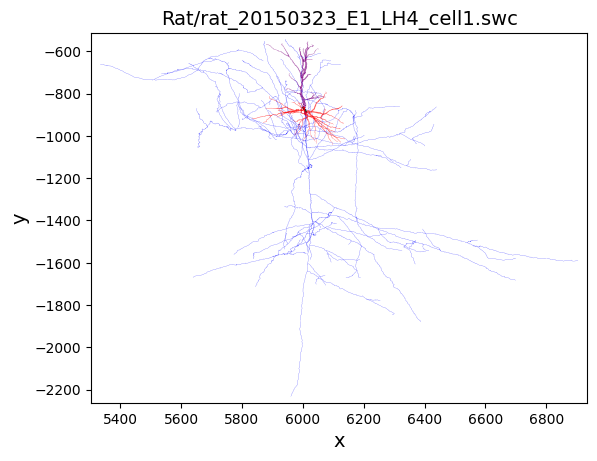

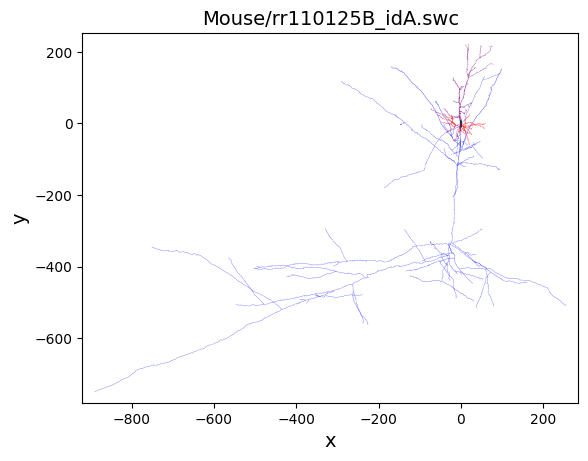

In [5]:
fig = plt.figure(figsize=(12,8))
view.neuron(rat_neuron)
view.neuron(mouse_neuron)

## 3.3 Extract the topology (TMD) of a neuron

In [6]:
rat_topology = tmd.methods.get_persistence_diagram(rat_neuron.apical_dendrite[0])
mouse_topology = tmd.methods.get_persistence_diagram(mouse_neuron.apical_dendrite[0])

## 3.4 Plot the topology (TMD) of a neuron

### Topological Barcode

Text(0.5, 1.0, 'Mouse topology')

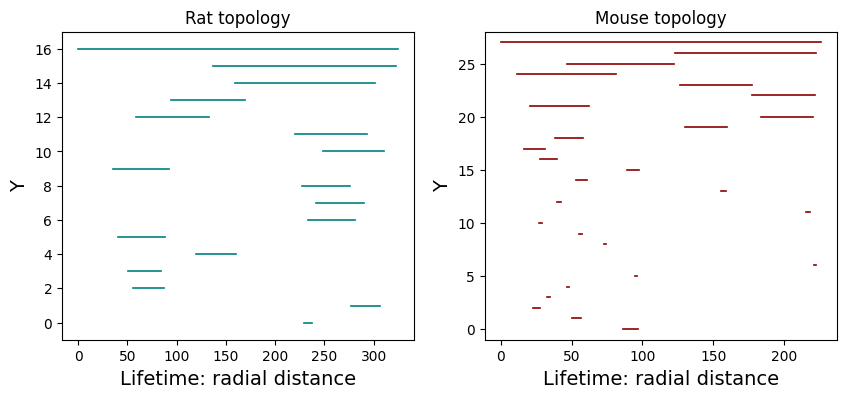

In [7]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
view.plot.barcode(rat_topology, new_fig=False, color='teal')
ax.set_title('Rat topology')

ax = fig.add_subplot(122)
view.plot.barcode(mouse_topology, new_fig=False, color='darkred')
ax.set_title('Mouse topology')

### Topological Diagram

Text(0.5, 1.0, 'Mouse topology')

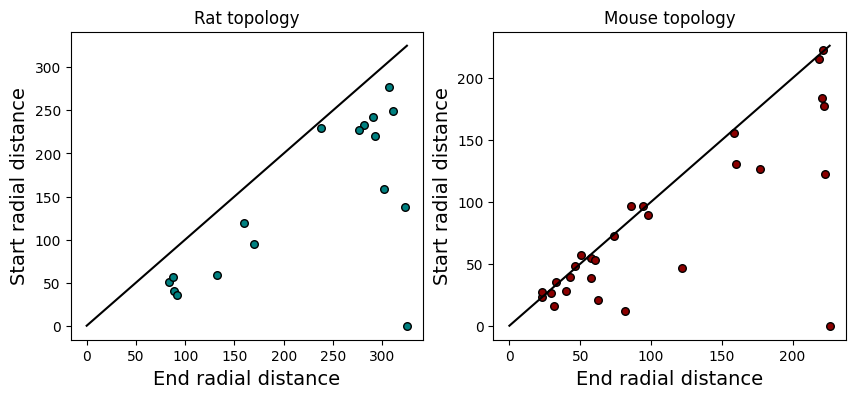

In [8]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
view.plot.diagram(rat_topology, new_fig=False, color='teal')
ax.set_title('Rat topology')

ax = fig.add_subplot(122)
view.plot.diagram(mouse_topology, new_fig=False, color='darkred')
ax.set_title('Mouse topology')

### Topological Image

Text(0.5, 1.0, 'Mouse topology')

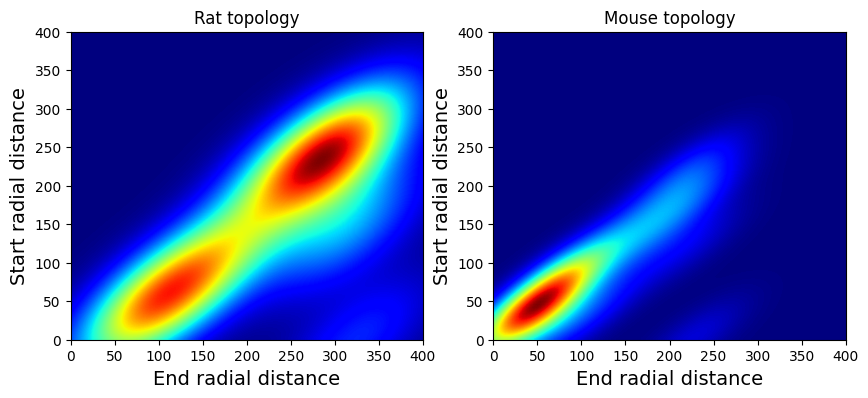

In [9]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
Z1 = view.plot.persistence_image(rat_topology, new_fig=False, xlim=(0,400), ylim=(0,400))[0]
ax.set_title('Rat topology')

ax = fig.add_subplot(122)
Z2 = view.plot.persistence_image(mouse_topology, new_fig=False, xlim=(0,400), ylim=(0,400))[0]
ax.set_title('Mouse topology')

Normalize scaling between species. 

Text(0.5, 1.0, 'Mouse topology')

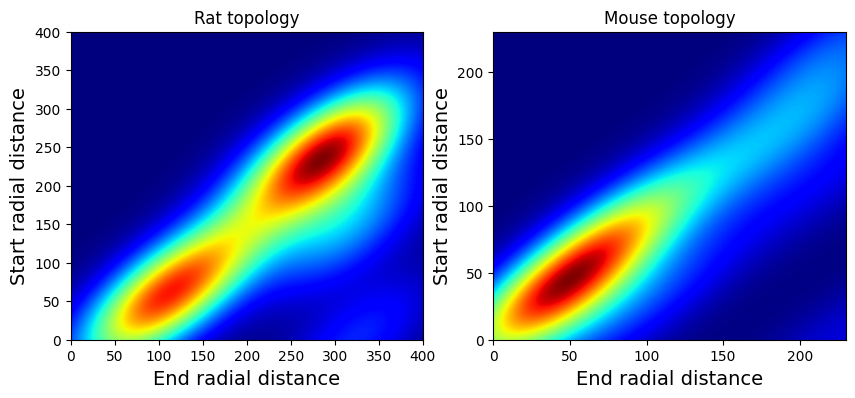

In [10]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
Z3 = view.plot.persistence_image(rat_topology, new_fig=False, xlim=(0,400), ylim=(0,400))[0]
ax.set_title('Rat topology')

ax = fig.add_subplot(122)
Z4 = view.plot.persistence_image(mouse_topology, new_fig=False, xlim=(0,230), ylim=(0,230))[0]
ax.set_title('Mouse topology')

## 3.5 Topological Comparison of the species

### Using persistence images 

In [11]:
phsR = [tmd.methods.get_persistence_diagram(n.apical_dendrite[0]) for n in Rat_morphologies.neurons]
phsM = [tmd.methods.get_persistence_diagram(n.apical_dendrite[0]) for n in Mouse_morphologies.neurons]

#### Unnormalized 

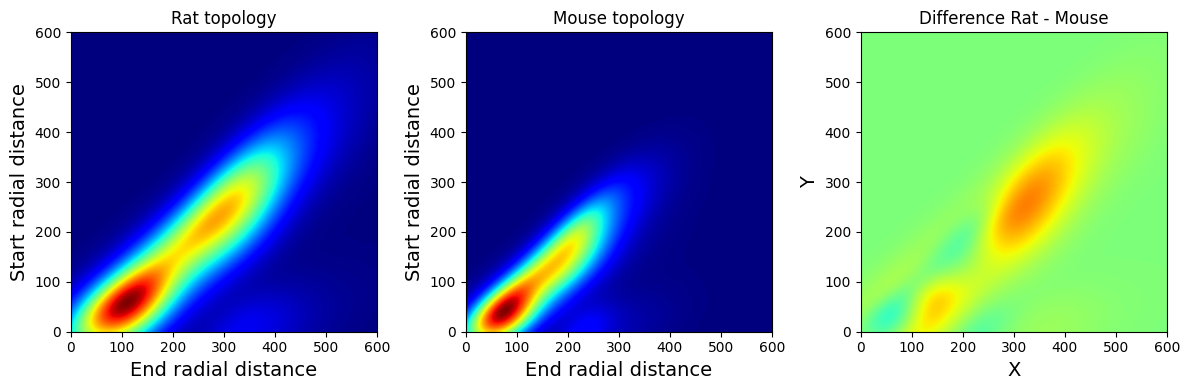

In [12]:
lim = (0, 600)
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(131)
Z3 = view.plot.persistence_image_average(phsR, new_fig=False, xlim=lim, ylim=lim)[0]
ax.set_title('Rat topology')

ax = fig.add_subplot(132)
Z4 = view.plot.persistence_image_average(phsM, new_fig=False, xlim=lim, ylim=lim)[0]
ax.set_title('Mouse topology')

ax = fig.add_subplot(133)
_ = view.plot.persistence_image_diff(Z3, Z4, xlim=lim, ylim=lim, new_fig=False)
ax.set_title('Difference Rat - Mouse')

plt.tight_layout()

#### Normalized 

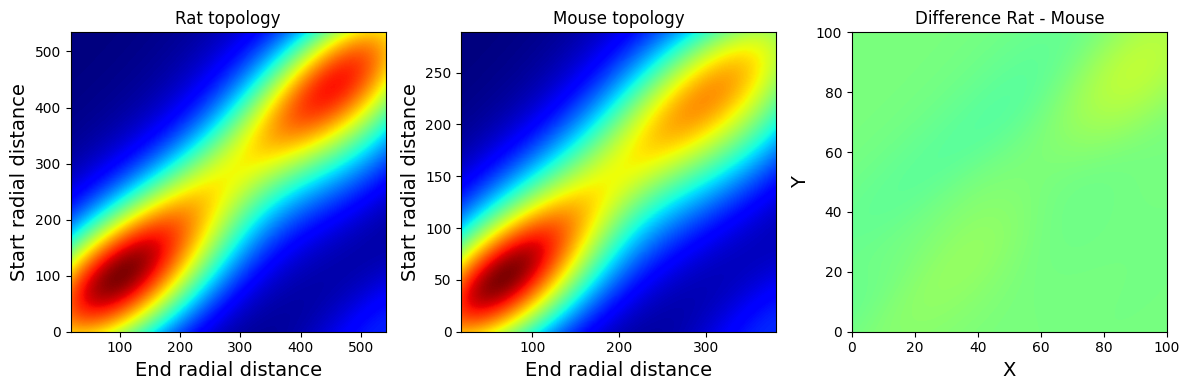

In [13]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(131)
Z3 = view.plot.persistence_image_average(phsR, new_fig=False)[0]
ax.set_title('Rat topology')

ax = fig.add_subplot(132)
Z4 = view.plot.persistence_image_average(phsM, new_fig=False)[0]
ax.set_title('Mouse topology')

ax = fig.add_subplot(133)
_ = view.plot.persistence_image_diff(Z3, Z4, new_fig=False)
ax.set_title('Difference Rat - Mouse')

plt.tight_layout()

### Using persistence entropy 

In [14]:
lim = (0, 600)
bins = np.linspace(lim[0], lim[1], 300)

In [15]:
entropyR = [tmd.vectorizations.life_entropy_curve(p, bins=bins)[0] for p in phsR]
entropyM = [tmd.vectorizations.life_entropy_curve(p, bins=bins)[0] for p in phsM]

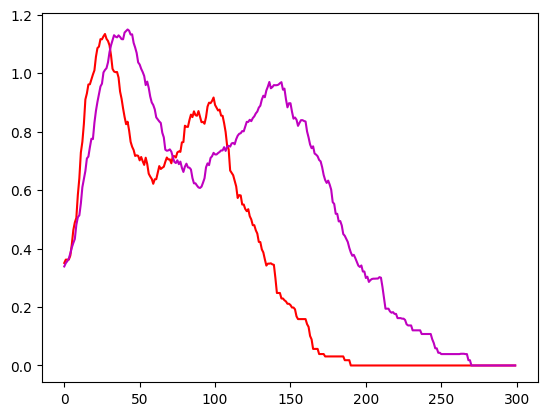

In [16]:
plt.plot(np.average(entropyM, axis=0), color='r')
plt.plot(np.average(entropyR, axis=0), color='m')

#### Normalization of entropies for mouse / rat

In [17]:
limM = (0, 400)
limR = (0, 600)

In [18]:
binsR = np.linspace(limR[0], limR[1], 300)
binsM = np.linspace(limM[0], limM[1], 300)

entropyR = [tmd.vectorizations.life_entropy_curve(p, bins=binsR)[0] for p in phsR]
entropyM = [tmd.vectorizations.life_entropy_curve(p, bins=binsM)[0] for p in phsM]

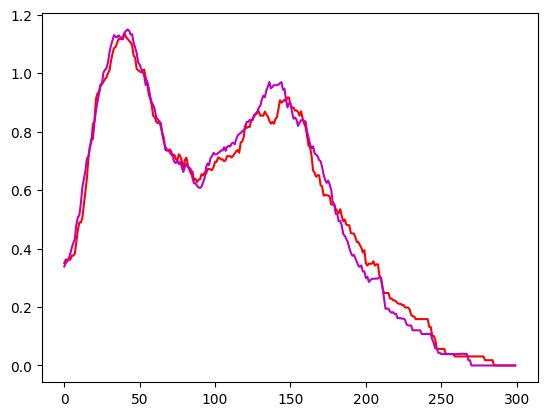

In [19]:
plt.plot(np.average(entropyM, axis=0), color='r')
plt.plot(np.average(entropyR, axis=0), color='m')

### Using umap embedding

In [20]:
import umap

In [21]:
imgsR = [tmd.vectorizations.persistence_image_data(np.array(p)[:,:2], xlim=lim, ylim=lim, bw_method=0.5).flatten() for p in phsR]
imgsM = [tmd.vectorizations.persistence_image_data(np.array(p)[:,:2], xlim=lim, ylim=lim, bw_method=0.5).flatten() for p in phsM]

In [22]:
reducer = umap.UMAP(n_components=3, random_state=2025)
trainHA = reducer.fit(imgsR + imgsM)

/Users/kanari/OBI/Code/venvSDK/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kanari/OBI/Code/venvSDK/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


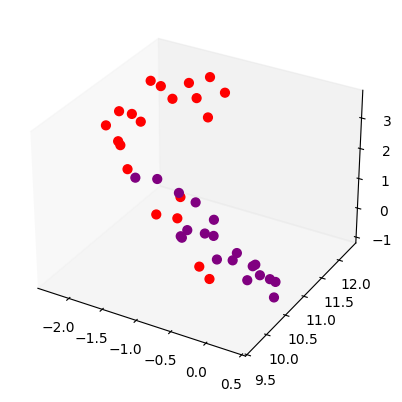

In [23]:
fig = plt.figure()
ax = plt.axes(projection="3d")
#fig.set_facecolor("darkslategrey")
#ax.set_facecolor("darkslategrey")
ax.grid(False)

ax.scatter3D(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 1],
    trainHA.embedding_[:, 2],
    alpha=1, 
    s=40,
    color= ['purple'] * len(imgsR) + ['red'] * len(imgsM)
)

In [24]:
imgsR = [tmd.vectorizations.persistence_image_data(np.array(p)[:,:2], xlim=limR, ylim=limR, bw_method=0.5).flatten() for p in phsR]
imgsM = [tmd.vectorizations.persistence_image_data(np.array(p)[:,:2], xlim=limM, ylim=limM, bw_method=0.5).flatten() for p in phsM]

In [25]:
reducer = umap.UMAP(n_components=3, random_state=2025)
trainHA = reducer.fit(imgsR + imgsM)

/Users/kanari/OBI/Code/venvSDK/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kanari/OBI/Code/venvSDK/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


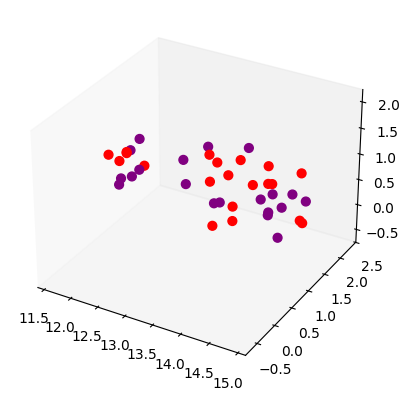

In [26]:
fig = plt.figure()
ax = plt.axes(projection="3d")
#fig.set_facecolor("darkslategrey")
#ax.set_facecolor("darkslategrey")
ax.grid(False)

ax.scatter3D(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 1],
    trainHA.embedding_[:, 2],
    alpha=1, 
    s=40,
    color= ['purple'] * len(imgsR) + ['red'] * len(imgsM)
)